<a href="https://colab.research.google.com/github/kungfumas/aplikasi-deep-learning/blob/master/DeepLearningDataBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Mengimpor dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/kungfumas/aplikasi-deep-learning/master/Data_bank_churn.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
# Mengonversi data kategori jenis kelamin menjadi numerik
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
# Membuat dummy variable untuk kolom negara
# apa itu dummy variabel? baca di penjelasan
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = np.float)
# Menghilangkan 1 dummy variabel di kolom negara
X = X[:, 1:]
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Inisialisasi ANN
MesinKlasifikasi = Sequential()
# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
MesinKlasifikasi.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100


<ipython-input-8-b77672b58527>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(columnTransformer.fit_transform(X), dtype = np.float)


800/800 [==============================] - 2s 2ms/step - loss: 0.4940 - accuracy: 0.7956
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4262 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8224
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4120 - accuracy: 0.8313
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4075 - accuracy: 0.8324
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8349
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8351
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8345
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3998 - accuracy: 0.8341
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8356
E

In [9]:
# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 0s 2ms/step


In [10]:
cm

array([[1497,   98],
       [ 192,  213]])

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MesinKlasifikasi)

TypeError: ignored

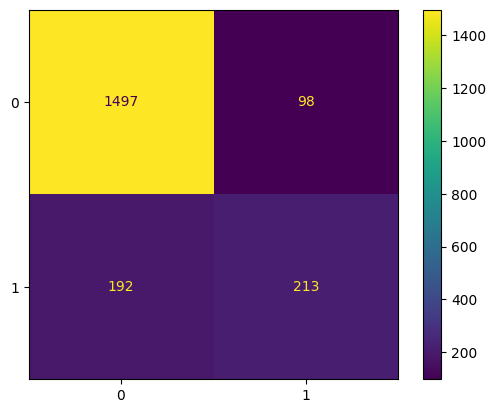

In [12]:
disp.plot()